In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\nake_\Downloads\Mall_Customers.csv')

In [4]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Univariate analysis

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

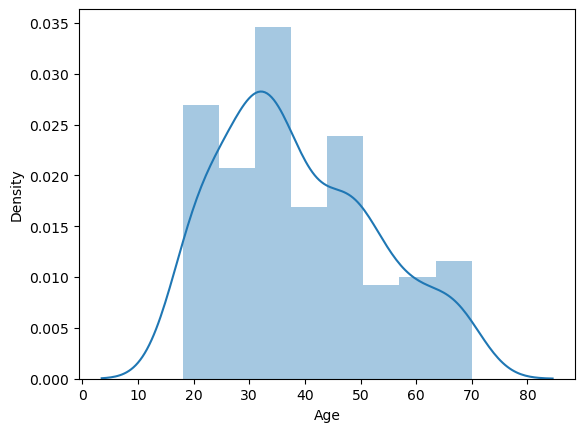

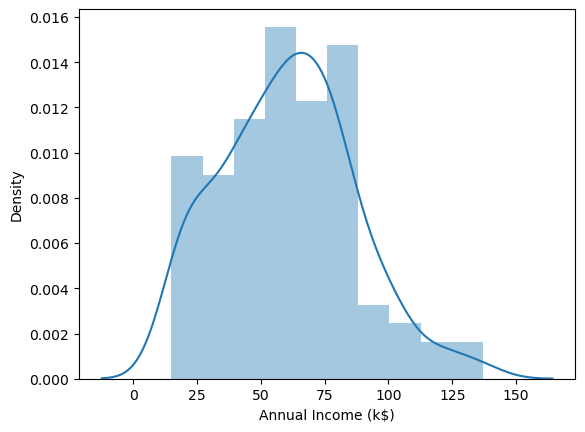

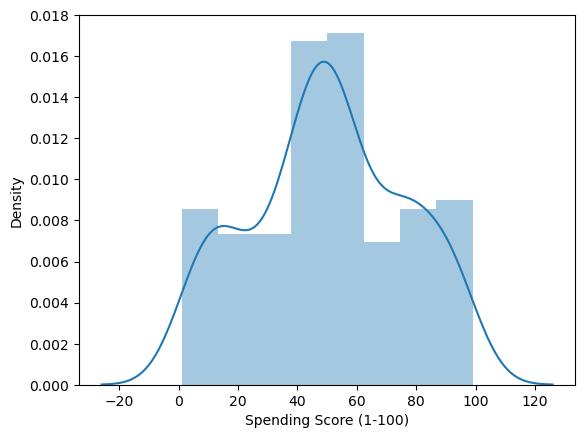

In [9]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.distplot(df[i])

<Axes: xlabel='Annual Income (k$)', ylabel='Density'>

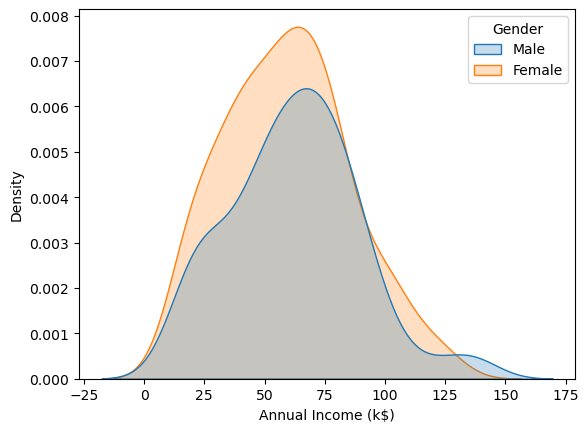

In [10]:
sns.kdeplot(data=df, x="Annual Income (k$)", hue="Gender", fill=True)

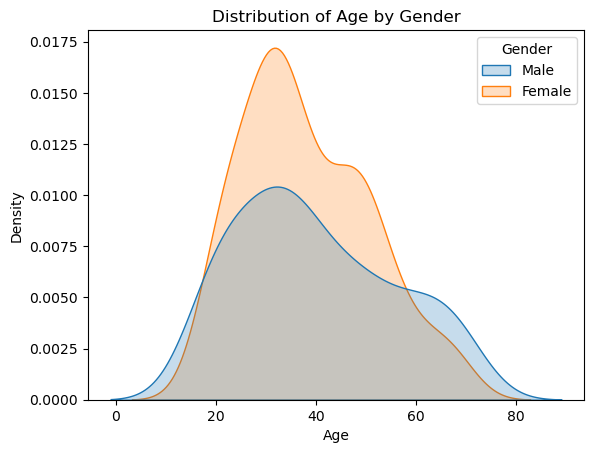

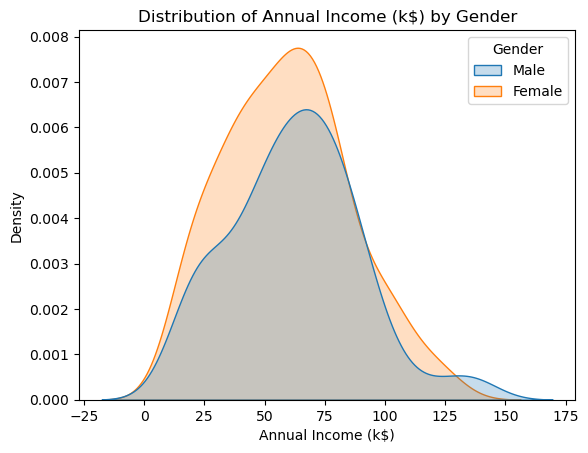

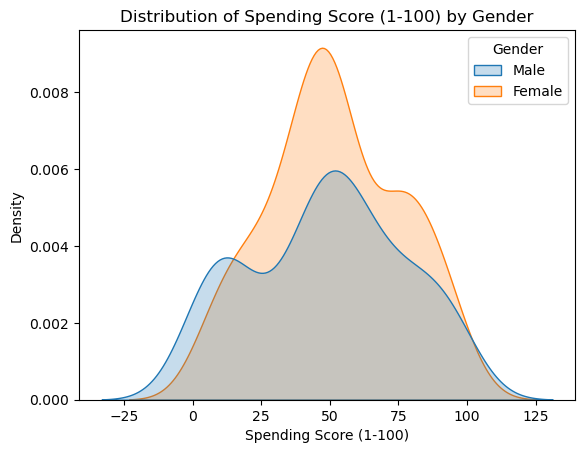

In [11]:
columns = ['Age', 'Annual Income (k$)','Spending Score (1-100)']
for i in columns:
    plt.figure()
    sns.kdeplot(data=df, x=i, hue="Gender", fill=True)
    plt.title(f"Distribution of {i} by Gender")
    plt.show()

In [12]:
df['Gender'].value_counts(normalize=True)

Gender
Female    0.56
Male      0.44
Name: proportion, dtype: float64

Bivariate Analysis

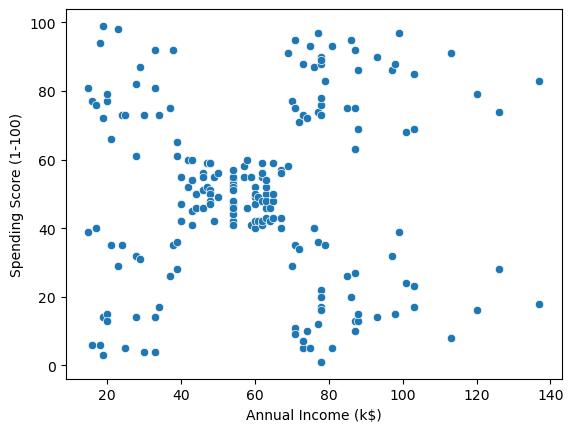

In [14]:
sns.scatterplot(data=df, x='Annual Income (k$)',y='Spending Score (1-100)' );

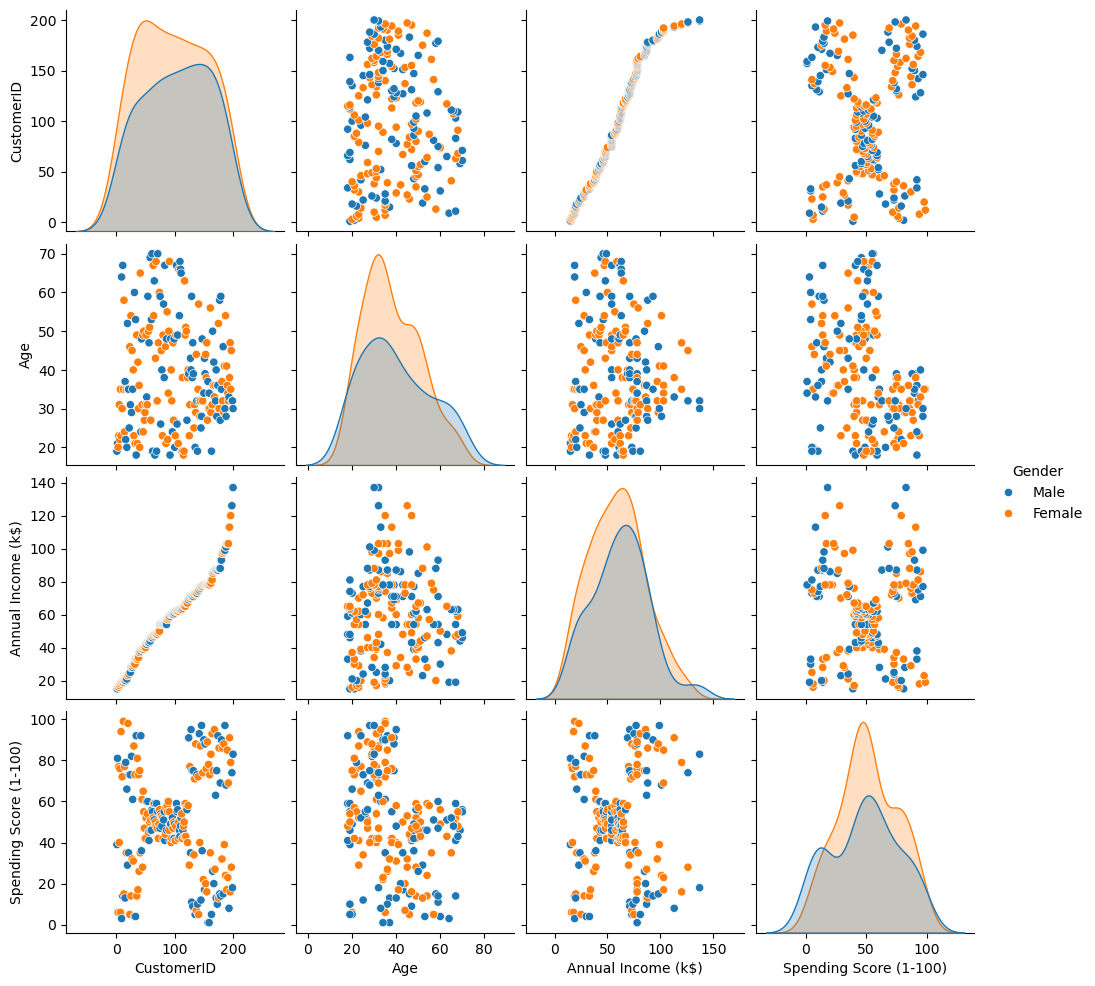

In [15]:
sns.pairplot(df,hue='Gender')

In [16]:
df.groupby('Gender')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Gender,,,
Female,38.098214,59.250000,51.526786
Male,39.806818,62.227273,48.511364


In [17]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})  # Encode Gender as 0 and 1
correlation_matrix = df.corr()
print(correlation_matrix)

                        CustomerID    Gender       Age  Annual Income (k$)  \
CustomerID                1.000000 -0.057400 -0.026763            0.977548   
Gender                   -0.057400  1.000000 -0.060867           -0.056410   
Age                      -0.026763 -0.060867  1.000000           -0.012398   
Annual Income (k$)        0.977548 -0.056410 -0.012398            1.000000   
Spending Score (1-100)    0.013835  0.058109 -0.327227            0.009903   

                        Spending Score (1-100)  
CustomerID                            0.013835  
Gender                                0.058109  
Age                                  -0.327227  
Annual Income (k$)                    0.009903  
Spending Score (1-100)                1.000000  


<Axes: >

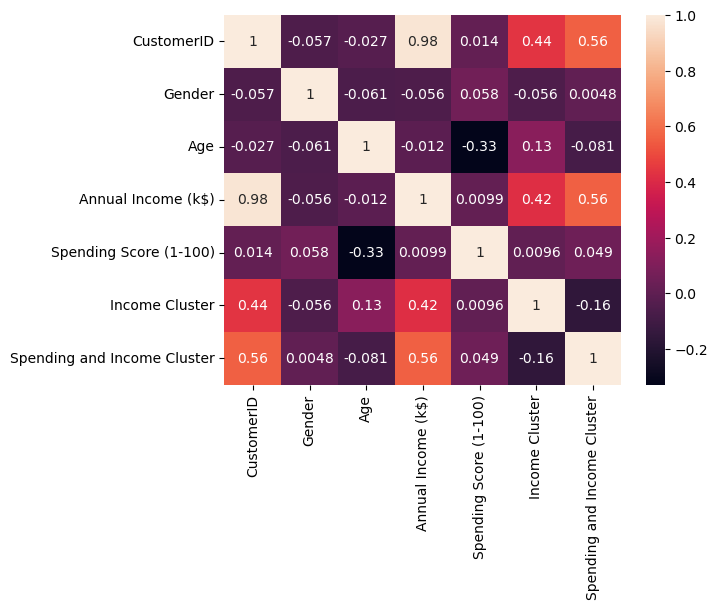

In [67]:
sns.heatmap(df.corr(),annot=True)

Clustering

In [20]:
clustering1 = KMeans(n_clusters=3)

In [21]:
clustering1.fit(df[['Annual Income (k$)']])

KMeans(n_clusters=3)

In [22]:
clustering1.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [23]:
df['Income Cluster'] = clustering1.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster
0,1,0,19,15,39,0
1,2,0,21,15,81,0
2,3,1,20,16,6,0
3,4,1,23,16,77,0
4,5,1,31,17,40,0


In [24]:
df['Income Cluster'].value_counts()

Income Cluster
2    86
0    58
1    56
Name: count, dtype: int64

In [25]:
clustering1.inertia_

25640.457784396836

In [26]:
intertia_scores=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(df[['Annual Income (k$)']])
    intertia_scores.append(kmeans.inertia_)

In [27]:
intertia_scores

[137277.28000000003,
 48968.02080832332,
 25640.457784396836,
 13278.112713472488,
 9384.572427572428,
 5496.533937621833,
 4151.905555555555,
 3367.0459893048137,
 2395.5563725490197,
 2322.5077569489335]

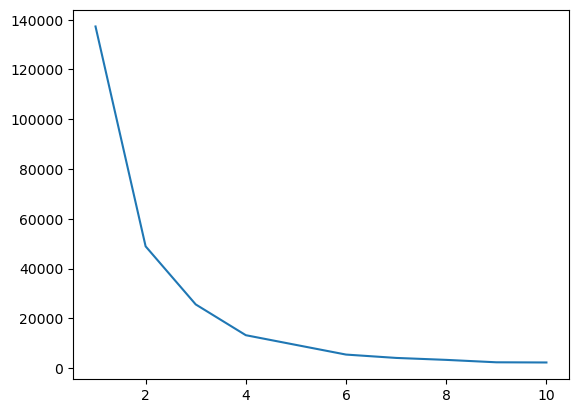

In [28]:
plt.plot(range(1,11),intertia_scores)

In [29]:
df.groupby('Income Cluster')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Age,Annual Income (k$),Spending Score (1-100)
Income Cluster,,,
0,37.120690,29.551724,49.689655
1,36.910714,92.142857,50.517857
2,41.279070,60.906977,50.337209


In [30]:
clustering2 = KMeans(n_clusters=5)
clustering2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
df['Spending and Income Cluster'] =clustering2.labels_
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income Cluster,Spending and Income Cluster
0,1,0,19,15,39,0,2
1,2,0,21,15,81,0,0
2,3,1,20,16,6,0,2
3,4,1,23,16,77,0,0
4,5,1,31,17,40,0,2


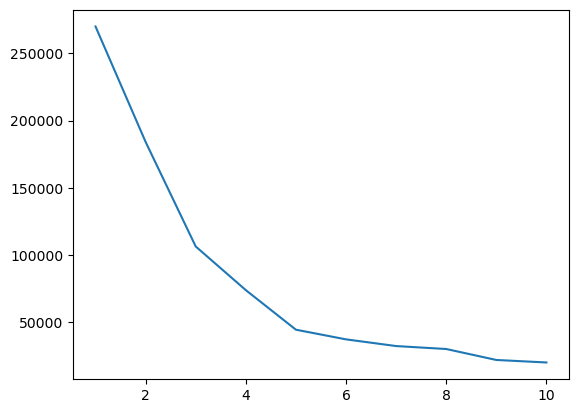

In [31]:
intertia_scores2=[]
for i in range(1,11):
    kmeans2=KMeans(n_clusters=i)
    kmeans2.fit(df[['Annual Income (k$)','Spending Score (1-100)']])
    intertia_scores2.append(kmeans2.inertia_)
plt.plot(range(1,11),intertia_scores2)

In [32]:
centers =pd.DataFrame(clustering2.cluster_centers_)
centers.columns = ['x','y']

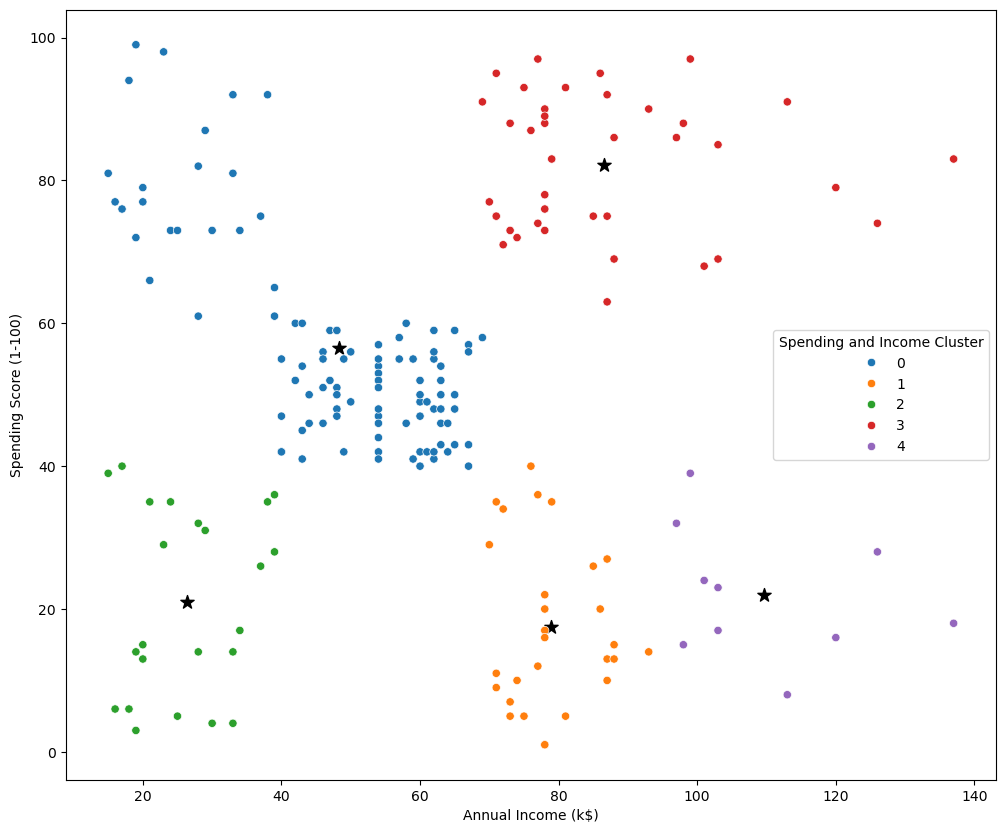

In [33]:
plt.figure(figsize=(12,10))
plt.scatter(x=centers['x'],y=centers['y'],s=100,c='black',marker='*')
sns.scatterplot(data=df, x ='Annual Income (k$)',y='Spending Score (1-100)',hue='Spending and Income Cluster',palette='tab10')
plt.savefig('clustering_bivaraiate.png')

In [34]:
pd.crosstab(df['Spending and Income Cluster'],df['Gender'],normalize='index')

Gender,0,1
Spending and Income Cluster,,
0,0.410000,0.590000
1,0.607143,0.392857
2,0.391304,0.608696
3,0.461538,0.538462
4,0.300000,0.700000
